In [25]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

from sklearn.metrics import confusion_matrix
import itertools

%matplotlib inline

In [2]:
train_dataset = torchvision.datasets.MNIST(root=".", 
                                          train=True,
                                          download=True, 
                                          transform=transforms.ToTensor())

In [3]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
train_dataset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

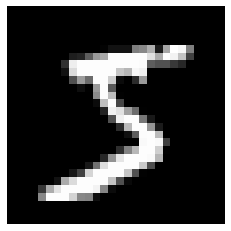

In [5]:
plt.imshow(train_dataset.data[0].numpy(), cmap=plt.get_cmap("gray"))
plt.axis("off")
plt.show()

In [6]:
train_dataset.data.max()

tensor(255, dtype=torch.uint8)

In [7]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [8]:
dir(train_dataset)

['__add__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_exists',
 '_format_transform_repr',
 '_is_protocol',
 '_repr_indent',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'processed_folder',
 'raw_folder',
 'resources',
 'root',
 'target_transform',
 'targets',
 'test_data',
 'test_file',
 'test_labels',
 'train',
 'train_data',
 'train_labels',
 'training_file',
 'transform',
 'transforms']

In [9]:
train_dataset.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [10]:
test_dataset = torchvision.datasets.MNIST(root=".",
                                         train=False, 
                                         download=True,
                                         transform=transforms.ToTensor())
test_dataset.data.shape

torch.Size([10000, 28, 28])

In [11]:
model = nn.Sequential(
    nn.Linear(28 * 28, 400), 
    nn.ReLU(), 
    nn.Linear(400, 200), 
    nn.ReLU(), 
    nn.Linear(200, 100), 
    nn.ReLU(), 
    nn.Linear(100, 50), 
    nn.ReLU(), 
    nn.Linear(50, 10)
)

In [12]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [13]:
model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=400, bias=True)
  (1): ReLU()
  (2): Linear(in_features=400, out_features=200, bias=True)
  (3): ReLU()
  (4): Linear(in_features=200, out_features=100, bias=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=50, bias=True)
  (7): ReLU()
  (8): Linear(in_features=50, out_features=10, bias=True)
)

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters())

In [15]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size,
                                          shuffle=False)

In [16]:
train_dataset.transform(train_dataset.data.numpy()).max()

tensor(1.)

In [20]:
n_epochs = 10

train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for epoch in range(n_epochs):
    train_loss = []
    for inputs, targets in train_loader:
        # Move data to gpu
        inputs, targets = inputs.to(device), targets.to(device)

        inputs = inputs.view(-1, 28 * 28) 

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, targets)

        loss.backward()
        optimizer.step()

        train_loss.append(loss.item())
    train_loss = np.mean(train_loss)
  
    test_loss = []
    for inputs, targets in test_loader:    
        inputs, targets = inputs.to(device), targets.to(device)
        inputs = inputs.view(-1, 28 * 28)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss.append(loss.item())
    test_loss = np.mean(test_loss)

    train_losses[epoch] = train_loss
    test_losses[epoch] = test_loss

    print(f"Epoch {epoch + 1}/{n_epochs}: Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

Epoch 1/10: Train Loss: 0.3627, Test Loss: 0.1424
Epoch 2/10: Train Loss: 0.1252, Test Loss: 0.1049
Epoch 3/10: Train Loss: 0.0842, Test Loss: 0.0893
Epoch 4/10: Train Loss: 0.0598, Test Loss: 0.0781
Epoch 5/10: Train Loss: 0.0457, Test Loss: 0.0731
Epoch 6/10: Train Loss: 0.0351, Test Loss: 0.0746
Epoch 7/10: Train Loss: 0.0273, Test Loss: 0.0822
Epoch 8/10: Train Loss: 0.0241, Test Loss: 0.0790
Epoch 9/10: Train Loss: 0.0213, Test Loss: 0.0834
Epoch 10/10: Train Loss: 0.0169, Test Loss: 0.0985


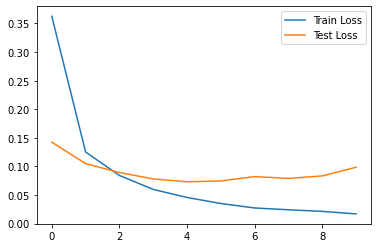

In [21]:
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.legend()
plt.show()

In [22]:
n_correct = 0
n_total = 0

for inputs, targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    inputs = inputs.view(-1, 28 * 28)

    outputs = model(inputs)

    _, predictions = torch.max(outputs, 1)

    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

train_acc = n_correct / n_total

n_correct = 0
n_total = 0
for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    inputs = inputs.view(-1, 28 * 28)

    outputs = model(inputs)

    _, predictions = torch.max(outputs, 1)

    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

test_acc = n_correct / n_total

print(f"Train Acc: {train_acc:.4f}, Test Acc: {test_acc:4f}")

Train Acc: 0.9932, Test Acc: 0.977100


In [23]:
def plot_confucsion_matrix(cm, classes, 
                           normalize=False,
                           title="Confusion Matrix", 
                           cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")    

    print(cm)

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),   
                 horizontalalignment="center",           
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

Confusion matrix, without normalization
[[ 972    0    1    0    0    0    5    0    1    1]
 [   2 1114    3    1    0    2    2    0   10    1]
 [   4    0 1018    3    2    0    1    0    4    0]
 [   1    0    3  991    0    6    0    1    4    4]
 [   1    0    4    0  960    0    3    0    1   13]
 [   2    0    0   10    1  870    5    0    3    1]
 [   3    1    0    1    3    3  945    0    2    0]
 [   1    2   24   11    3    0    0  974    1   12]
 [   8    0    6    3    1    5    3    2  941    5]
 [   2    2    0    6    9    3    0    0    1  986]]


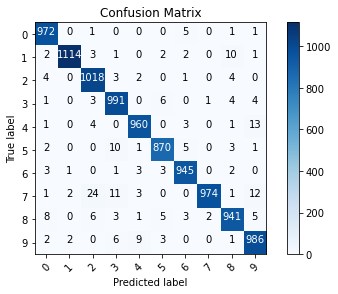

In [26]:
x_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()
p_test = np.array([])

for inputs, targets in test_loader:
    inputs = inputs.to(device)

    inputs = inputs.view(-1, 28 * 28)

    outputs = model(inputs)

    _, predictions = torch.max(outputs, 1)

    p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, p_test)
plot_confucsion_matrix(cm, list(range(10)))

In [ ]:
misclassifed_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassifed_idx)
plt.imshow(x_test[i], cmap="gray")
plt.title("True Label: %s predicted: %s" % (y_test[i], int(p_test[i])))
plt.show()